# Sample Code for Handling RGB Data in ANTs

# Demo with dummy rgb image

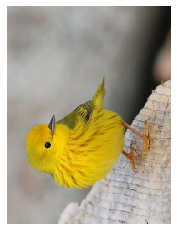

In [2]:
import ants
import numpy as np
PATH_TO_JPG_SAMPLE = '../bird.jpg'
import imageio

bird = imageio.imread(PATH_TO_JPG_SAMPLE)

bird_red = np.squeeze(bird[:,:,0])
bird_blue = np.squeeze(bird[:,:,1])
bird_green = np.squeeze(bird[:,:,2])

bird_ants = ants.merge_channels([
                        ants.from_numpy(bird_red.astype(float)),
                        ants.from_numpy(bird_blue.astype(float)),
                        ants.from_numpy(bird_green.astype(float))])
bird_ants.components = 3   
bird_ants.is_rgb = True

bird_ants

ants.image_write(bird_ants,'bird.nii.gz')

bird_nii = ants.image_read('bird.nii.gz')

ants.plot(bird_nii.vector_to_rgb())

# Demo with PAS data 

In [4]:
def convert_tiff_to_ants(tiff_image_path, offset=-400):
    tiff = ants.image_read(tiff_image_path)
    tiff_np = tiff.numpy()
    #print(tiff_np.shape)
    tiff_np_axis_0 = tiff_np[:,:,0]
    #print(tiff_np_axis_0.shape)
    tiff_np_axis_1 = tiff_np[:,:,1]
    #print(tiff_np_axis_1.shape)
    tiff_np_axis_2 = tiff_np[:,:,2]
    #print(tiff_np_axis_2.shape)
    tiff_0 = ants.from_numpy(tiff_np_axis_0)
    tiff_1 = ants.from_numpy(tiff_np_axis_1)
    tiff_2 = ants.from_numpy(tiff_np_axis_2)
    #print(tiff_0)
    #print(tiff_1)
    #print(tiff_2)
    
    x1 = tiff_0.shape[0]//2 + offset
    y1 = tiff_0.shape[1]//2 + offset
    patch_size = 1000
    patch0 = ants.crop_indices(tiff_0,(x1,y1), (x1+patch_size,y1+patch_size))
    patch1 = ants.crop_indices(tiff_1,(x1,y1), (x1+patch_size,y1+patch_size))
    patch2 = ants.crop_indices(tiff_2,(x1,y1), (x1+patch_size,y1+patch_size))
    #patch0.plot()
    #patch1.plot()
    #patch2.plot()
    #print(patch0)
    #print(patch1)
    #print(patch2)
    return patch0, patch1, patch2

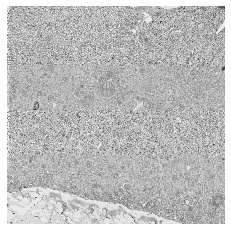

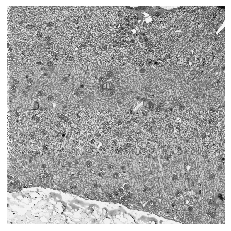

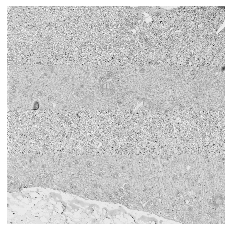

In [5]:
PATH_TO_TIFF_IMAGE = './PAS_data/tiff_16/VAN0005-RK-1-1-PAS_registered_16.ome.tiff'
ref0, ref1, ref2 = convert_tiff_to_ants(PATH_TO_TIFF_IMAGE)
#reference_image = ref_image_axis_1
ants.plot(ref0)
ants.plot(ref1)
ants.plot(ref2)

In [6]:
ref0_np = np.squeeze(ref0.numpy())
ref1_np = np.squeeze(ref1.numpy())
ref2_np = np.squeeze(ref2.numpy())
#tiff = ants.merge_channels([ref0, ref1, ref2])
#tiff

tiff_ants = ants.merge_channels([
                        ants.from_numpy(ref0_np.astype(float)),
                        ants.from_numpy(ref1_np.astype(float)),
                        ants.from_numpy(ref2_np.astype(float))])
tiff_ants.components = 3   
tiff_ants.is_rgb = True

In [7]:
#tiff.is_rgb = True
tiff_ants

ANTsImage
	 Pixel Type : float (float32)
	 Components : 3
	 Dimensions : (1000, 1000)
	 Spacing    : (1.0, 1.0)
	 Origin     : (0.0, 0.0)
	 Direction  : [1. 0. 0. 1.]

In [8]:
ants.image_write(tiff_ants,'patch.nii.gz')
patch = ants.image_read('patch.nii.gz')

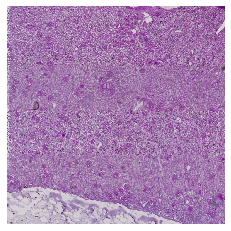

In [9]:
ants.plot(patch.vector_to_rgb())

In [10]:
patch1 = ants.crop_indices(patch,(475,475), (525,525))
patch1.is_rgb = True
patch1

ANTsImage
	 Pixel Type : float (float32)
	 Components : 3
	 Dimensions : (50, 50)
	 Spacing    : (1.0, 1.0)
	 Origin     : (475.0, 475.0)
	 Direction  : [1. 0. 0. 1.]

In [11]:
patch2 = np.squeeze(patch1.numpy()[:,:,0])
patch3 = np.squeeze(patch1.numpy()[:,:,1])
patch4 = np.squeeze(patch1.numpy()[:,:,2])
#tiff = ants.merge_channels([ref0, ref1, ref2])
#tiff

patch1_ants = ants.merge_channels([
                        ants.from_numpy(patch2.astype(float)),
                        ants.from_numpy(patch3.astype(float)),
                        ants.from_numpy(patch4.astype(float))])
patch1_ants.components = 3   
patch1_ants.is_rgb = True
patch1_ants

ANTsImage
	 Pixel Type : float (float32)
	 Components : 3
	 Dimensions : (50, 50)
	 Spacing    : (1.0, 1.0)
	 Origin     : (0.0, 0.0)
	 Direction  : [1. 0. 0. 1.]

In [12]:
ants.image_write(patch1_ants,'patch1.nii.gz')
patch1_ants = ants.image_read('patch1.nii.gz')
patch1_ants

ANTsImage
	 Pixel Type : float (float32)
	 Components : 3
	 Dimensions : (50, 50)
	 Spacing    : (1.0, 1.0)
	 Origin     : (0.0, 0.0)
	 Direction  : [1. 0. 0. 1.]

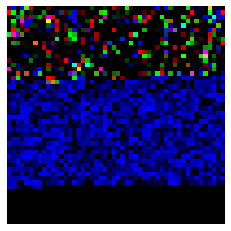

In [13]:
ants.plot(patch1_ants.vector_to_rgb())